# 0.0 Imports

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt



import matplotlib.pyplot as plt
%matplotlib inline

## 0.1 Loading Dataset

In [2]:
df_raw = pd.read_csv('../data/raw/train.csv')

In [3]:
df_raw.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# 1.0 Data Description

In [4]:
df_raw.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [5]:
df1 = df_raw.copy()

In [6]:
df1.columns = ['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response']

In [7]:
df1.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## 1.1 Data Dimension

In [8]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))


Number of rows: 381109
Number of columns: 12


## 1.2 Data Types

In [9]:
df1.dtypes

id                        int64
gender                   object
age                       int64
driving_license           int64
region_code             float64
previously_insured        int64
vehicle_age              object
vehicle_damage           object
annual_premium          float64
policy_sales_channel    float64
vintage                   int64
response                  int64
dtype: object

## 1.3 Check NA

In [10]:
df1.isnull().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

## 1.4 Data Descriptive

In [11]:
num_attributes = df1.select_dtypes(include= ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64, datetime64[ns]'])


In [12]:
# Central Tendency = Mean, Median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max()- x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#Concat

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [13]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


# 2.0 Feature Engineering

In [14]:
df2 = df1.copy()

In [15]:
# Vehicle Age
df2['vehicle_age'] = df2['vehicle_age'].apply(lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_years' if x == '1-2 Year' else 'below_1_year')

#Vehicle Damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply(lambda x: 1 if x == 'Yes' else 0)

# 3.0 Data Filtering

In [16]:
df3 = df2.copy()

# 4.0 EDA

In [17]:
df4 = df3.copy()

## 4.1 Univariate Analysis

### Age

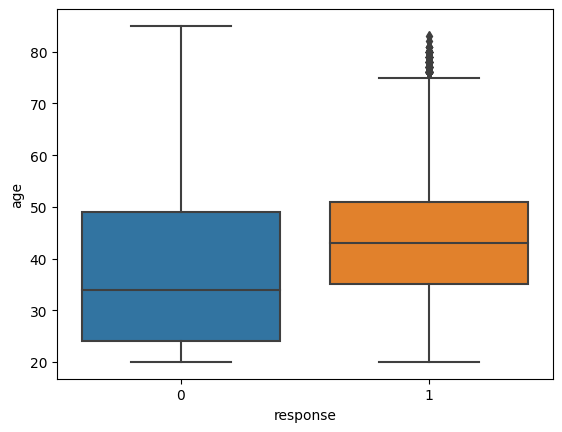

In [18]:
sns.boxplot(x='response', y='age', data=df4);

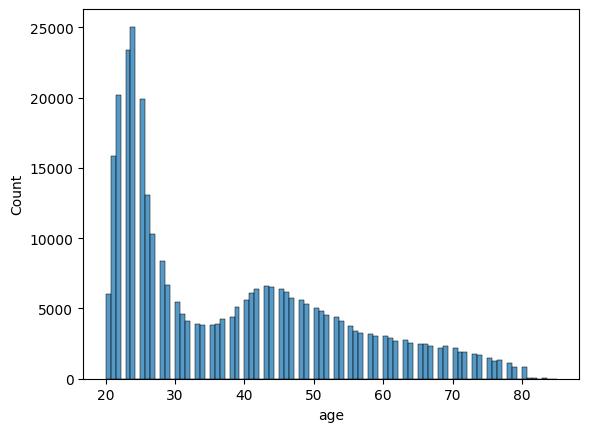

In [19]:
aux00 = df4.loc[df4['response']==0,'age']
sns.histplot(aux00);

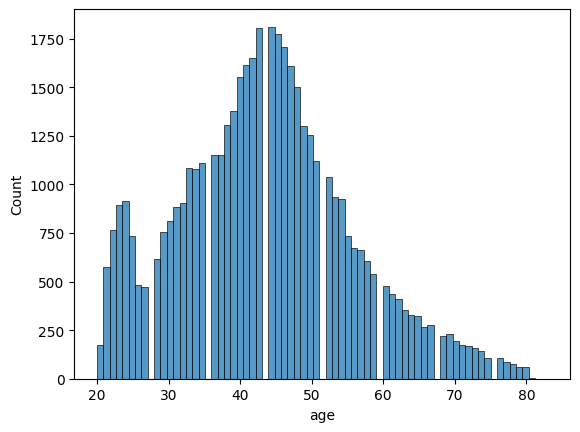

In [20]:
aux00 = df4.loc[df4['response']==1,'age']
sns.histplot(aux00);

### Annual Premium

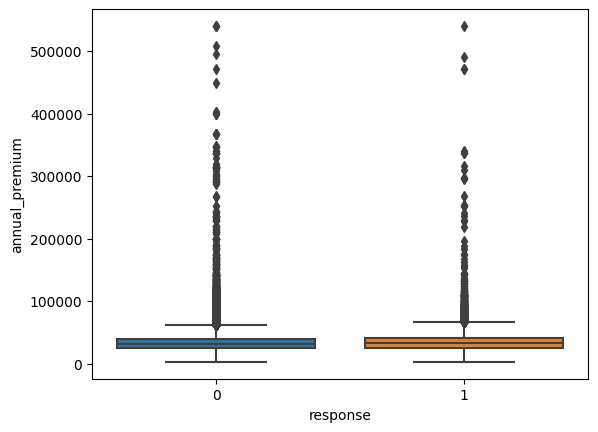

In [21]:
sns.boxplot(x='response', y='annual_premium', data=df4);

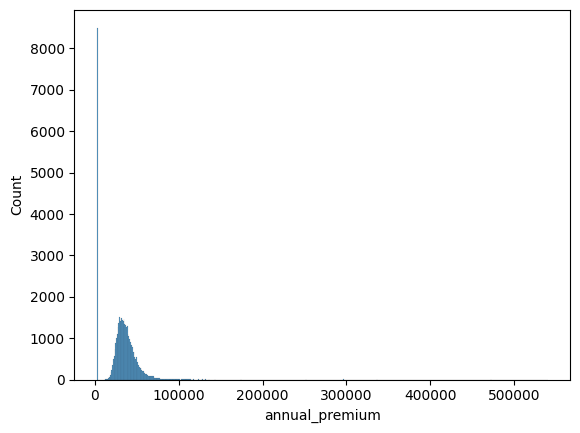

In [22]:
aux = df4.loc[df4['response']==1, 'annual_premium']
sns.histplot(aux);

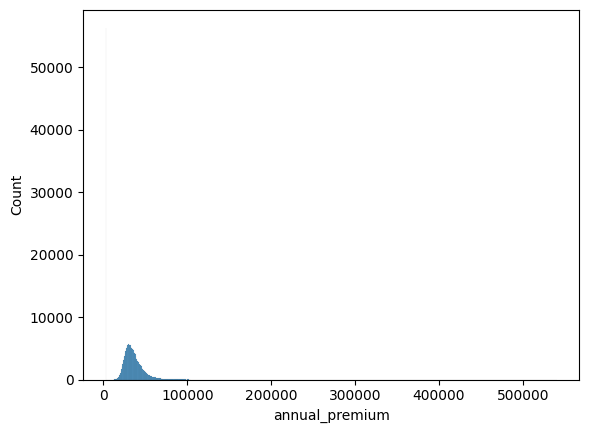

In [23]:
aux = df4.loc[df4['response']==0, 'annual_premium']
sns.histplot(aux);

In [24]:
aux = df4.loc[(df4['annual_premium']>10000) & (df4['annual_premium']<80000)]

<AxesSubplot: xlabel='annual_premium', ylabel='Count'>

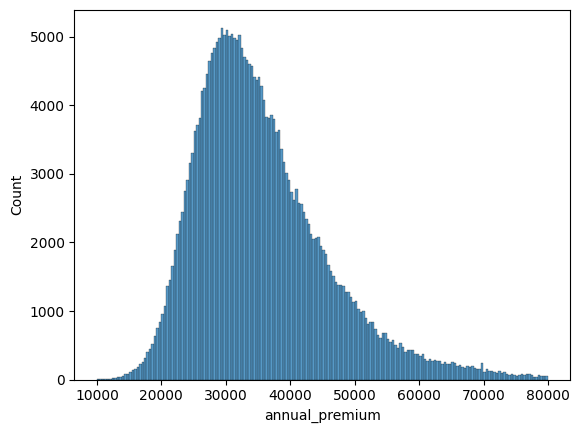

In [25]:
aux00 = aux.loc[aux['response']==0, 'annual_premium']
sns.histplot(aux00)

<AxesSubplot: xlabel='annual_premium', ylabel='Count'>

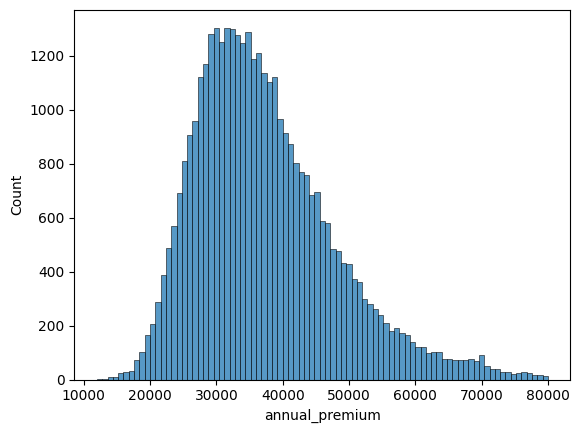

In [26]:
aux00 = aux.loc[aux['response']==1, 'annual_premium']
sns.histplot(aux00)

### Driving License

In [27]:
aux = df4[['driving_license', 'response']].groupby('response').sum().reset_index()
aux['driving_license_perc'] = aux['driving_license']/aux['driving_license'].sum()
#sns.barplot(x='response', y='driving_license', data=aux);
aux.head()

,response,driving_license,driving_license_perc
0,0,333628,0.877283
1,1,46669,0.122717


### Region Code

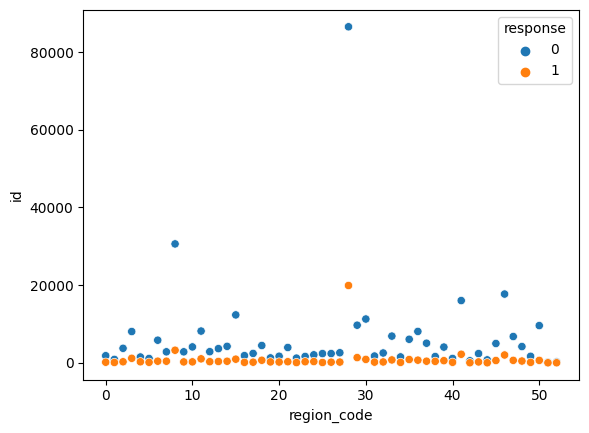

In [28]:
aux0 = df4[['id', 'region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()
sns.scatterplot(x='region_code', y='id', hue = 'response', data=aux0);

### Previously Insured

In [29]:
pd.crosstab(df4['previously_insured'], df4['response']).apply(lambda x: x/x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


### Vehicle Age

In [30]:
df4[['vehicle_age', 'response']].value_counts(normalize=True).reset_index()

,vehicle_age,response,0
0,between_1_2_years,0,0.434285
1,below_1_year,0,0.413488
2,between_1_2_years,1,0.091328
3,over_2_years,0,0.029663
4,below_1_year,1,0.018897
5,over_2_years,1,0.012338


### Policy Sales Channel

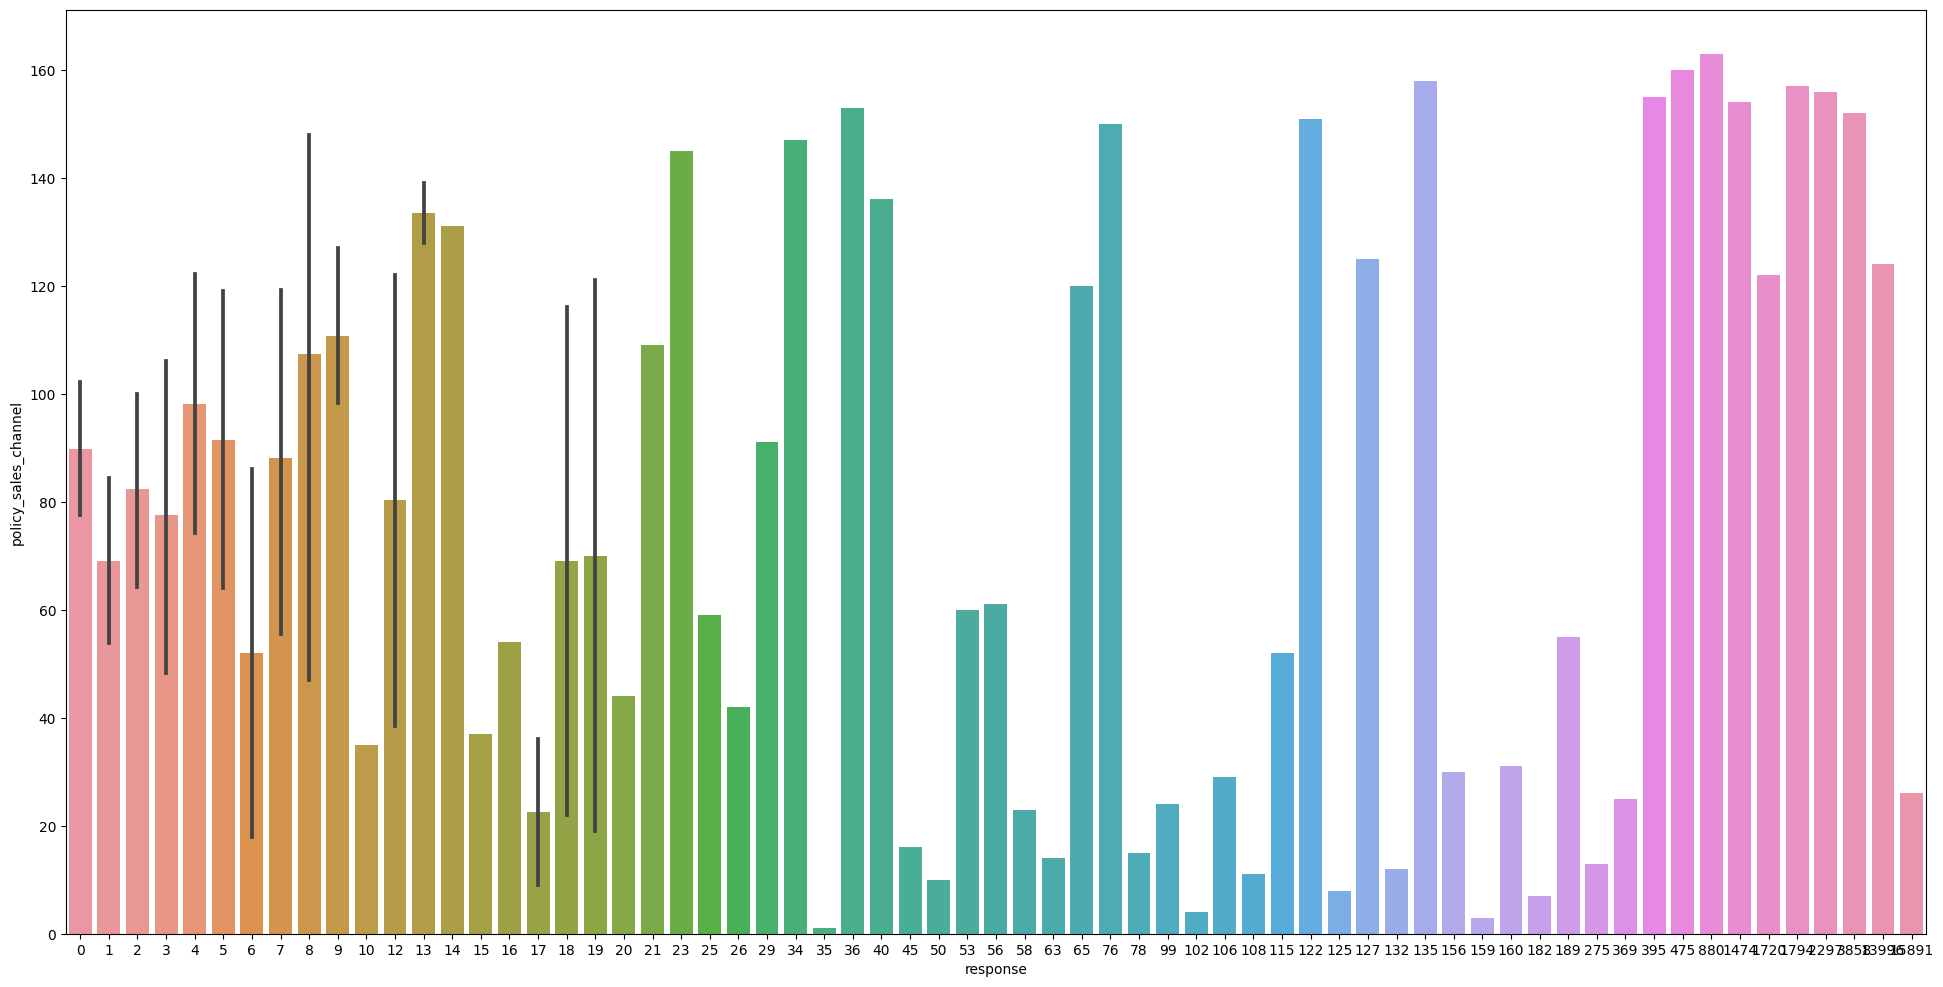

In [31]:
plt.figure(figsize=(24,12))
aux = df4[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().reset_index()
sns.barplot(x='response', y='policy_sales_channel', data=aux);


### Vintage

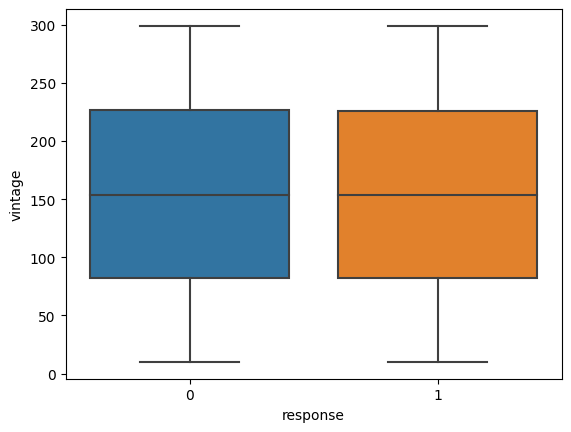

In [32]:
sns.boxplot(x='response', y='vintage', data=df4);

In [33]:
aux00 = df4.loc[df4['response']==0, 'vintage']

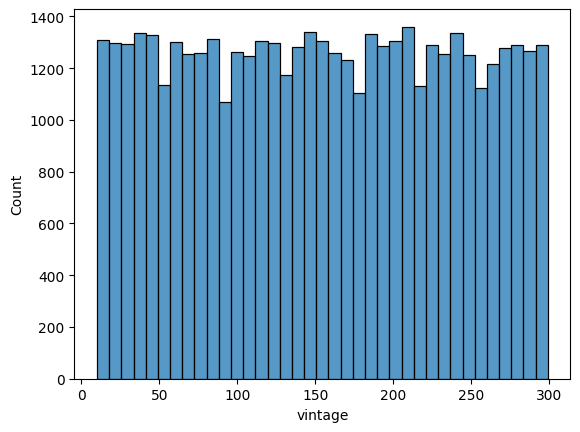

In [34]:
aux00 = df4.loc[df4['response']==1, 'vintage']
sns.histplot(aux00);

# 5.0 Data Preparation

In [71]:
df5 = df4.copy()

In [72]:
X = df4.drop('response', axis=1)
y = df4['response'].copy()

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

df5 = pd.concat([x_train, y_train], axis=1)

In [73]:
df5.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
332803,332804,Female,39,1,15.0,0,between_1_2_years,1,52906.0,55.0,227,1
116248,116249,Male,38,1,11.0,0,between_1_2_years,1,23038.0,26.0,29,0
255005,255006,Male,22,1,30.0,1,below_1_year,0,45318.0,152.0,166,0
317474,317475,Female,23,1,41.0,1,below_1_year,0,29132.0,151.0,277,0
344212,344213,Male,56,1,48.0,0,over_2_years,1,2630.0,154.0,155,0


## 5.1 Standardization

In [74]:
ss = StandardScaler()

# annual_premium
df5['annual_premium'] = ss.fit_transform(df5[['annual_premium']].values)

## 5.2 Rescaling

In [75]:
# Age
mms_age = MinMaxScaler()
df5['age'] = mms_age.fit_transform(df5[['age']].values)

# vintage
mms_vintage = MinMaxScaler()
df5['vintage'] = mms_vintage.fit_transform(df5[['vintage']].values)


## 5.3 Encoding

In [76]:
# gender
target_enconder_gender = df5.groupby('gender')['response'].mean()
df5.loc[:,'gender'] = df5['gender'].map(target_enconder_gender)

# region_code - Target Encoding / Frequency Encoding
target_encoder_region_code = df5.groupby('region_code')['response'].mean()
df5.loc[:, 'region_code'] = df5['region_code'].map(target_encoder_region_code)

# vehicle_age
df5 = pd.get_dummies(df5, prefix='vehicle_age', columns=['vehicle_age'])

# vehicle_damage

# policy_sales_channel
fe_policy_sales_channel = df5.groupby('policy_sales_channel').size() / len(df5)
df5.loc[:, 'policy_sales_channel'] = df5['policy_sales_channel'].map(fe_policy_sales_channel)

/tmp/ipykernel_8508/2609735485.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df5.loc[:,'gender'] = df5['gender'].map(target_enconder_gender)


In [77]:
df5.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vehicle_age_below_1_year,vehicle_age_between_1_2_years,vehicle_age_over_2_years
332803,332804,0.103373,0.292308,1,0.070151,0,1,1.294417,0.003309,0.750865,1,0,1,0
116248,116249,0.137774,0.276923,1,0.109796,0,1,-0.436638,0.209638,0.065744,0,0,1,0
255005,255006,0.137774,0.030769,1,0.074305,1,0,0.854640,0.353472,0.539792,0,1,0,0
317474,317475,0.103373,0.046154,1,0.122946,1,0,-0.083449,0.010050,0.923875,0,1,0,0
344212,344213,0.137774,0.553846,1,0.100978,0,1,-1.619422,0.015901,0.501730,0,0,0,1


## 5.4 Validation Preparing

In [78]:
# Gender

x_val.loc[:,'gender'] = x_val.loc[:,'gender'].map(target_enconder_gender)

# Age

x_val.loc[:,'age'] = mms_age.transform(x_val[['age']].values)

# Region Code

x_val.loc[:,'region_code'] = x_val.loc[:,'region_code'].map(target_encoder_region_code)

# Vehicle Age

x_val = pd.get_dummies(x_val, prefix='vehicle_age', columns= ['vehicle_age'])

# Annual Premium

x_val.loc[:,'annual_premium'] = ss.transform(x_val[['annual_premium']].values)

# Policy Sales Channel

x_val.loc[:,'policy_sales_channel'] = x_val.loc[:,'policy_sales_channel'].map(fe_policy_sales_channel)

# Vintage

x_val.loc[:,'vintage'] = mms_vintage.transform(x_val[['vintage']].values)

# FIll NA

x_val = x_val.fillna(0)

/tmp/ipykernel_8508/1242450251.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_val.loc[:,'gender'] = x_val.loc[:,'gender'].map(target_enconder_gender)


In [79]:
x_val.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_damage,annual_premium,policy_sales_channel,vintage,vehicle_age_below_1_year,vehicle_age_between_1_2_years,vehicle_age_over_2_years
200222,200223,0.103373,0.015385,1,0.126795,1,0,-0.589065,0.056874,0.214533,1,0,0
49766,49767,0.137774,0.538462,1,0.070151,0,1,0.401418,0.209638,0.318339,0,1,0
172201,172202,0.103373,0.323077,1,0.126795,0,1,-1.619422,0.209638,0.276817,0,1,0
160713,160714,0.103373,0.092308,1,0.109796,0,0,-1.619422,0.010050,0.892734,1,0,0
53272,53273,0.137774,0.476923,1,0.121270,0,1,0.199032,0.193934,0.882353,0,1,0


# 6.0 Feature Selection

## 6.1 BORUTA

## 6.2 Feature Importance 

In [83]:
# model definition
RF = RandomForestClassifier( n_estimators=200, random_state=42, n_jobs=-1 )

# data preparation
x_train_n = df5.drop( ['id', 'response'], axis=1 )
y_train_n = y_train.values
RF.fit( x_train_n, y_train_n )

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

Feature ranking:
                         feature  importance
0                        vintage    0.283335
0                 annual_premium    0.253840
0                            age    0.148019
0                    region_code    0.096489
0                 vehicle_damage    0.072570
0           policy_sales_channel    0.070480
0             previously_insured    0.048378
0                         gender    0.009908
0       vehicle_age_below_1_year    0.009462
0  vehicle_age_between_1_2_years    0.004483
0       vehicle_age_over_2_years    0.002481
0                driving_license    0.000556


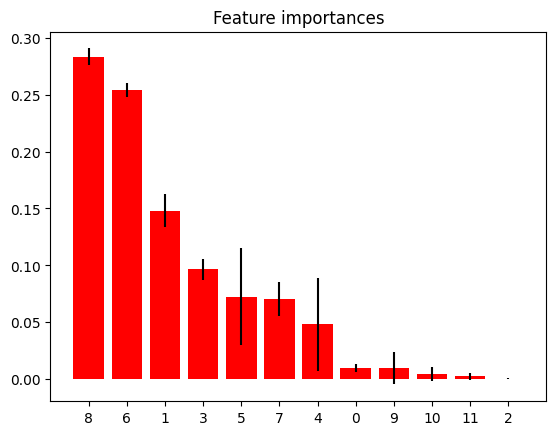

In [84]:
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
df = pd.DataFrame()
for i, j in zip( x_train_n, RF.feature_importances_ ):
    aux = pd.DataFrame( {'feature': i, 'importance': j}, index=[0] )
    df = pd.concat( [df, aux], axis=0 )
    
print( df.sort_values( 'importance', ascending=False ) )

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train_n.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train_n.shape[1]), indices)
plt.xlim([-1, x_train_n.shape[1]])
plt.show()

# 7.0 Machine Learning

In [86]:
cols_selected = ['annual_premium', 'vintage', 'age', 'region_code', 'vehicle_damage', 'previously_insured',
                 'policy_sales_channel']

x_train = df5[ cols_selected ]
x_val = x_val[ cols_selected ]
y_val = y_val.copy()

## 7.1 KNN

In [90]:
# model definition
knn_model = KNeighborsClassifier( n_neighbors=7 )

# model training
knn_model.fit( x_train, y_train )

# model prediction - Poder de GENERALIZACAO 
yhat_knn = knn_model.predict_proba( x_val )

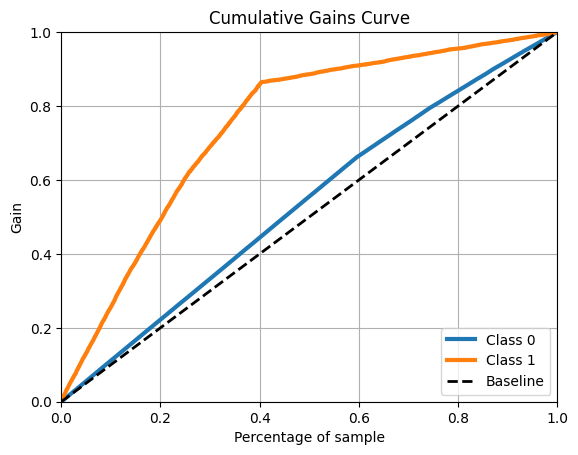

In [93]:
skplt.metrics.plot_cumulative_gain( y_val, yhat_knn ); 

## 7.2 Logistic Regression

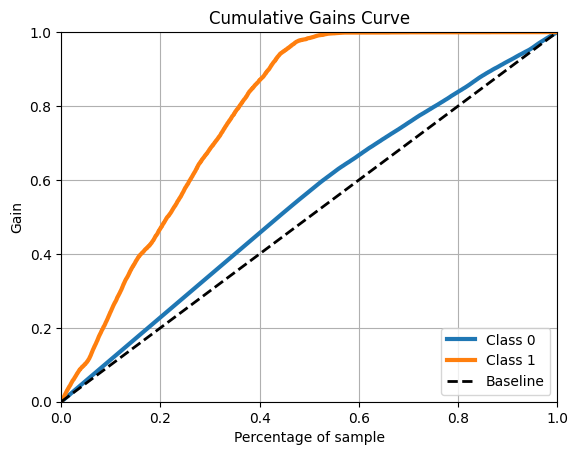

In [95]:
# model definition
lr_model = LogisticRegression( random_state=42 ) 

# model training
lr_model.fit( x_train, y_train )

# model prediction
yhat_lr = lr_model.predict_proba( x_val )

# Accumulative Gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_lr );